In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

print("Customers Dataset:")
print(customers.head())

print("\nProducts Dataset:")
print(products.head())

print("\nTransactions Dataset:")
print(transactions.head())


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [37]:

print("Customers Shape:", customers.shape)
print("Products Shape:", products.shape)
print("Transactions Shape:", transactions.shape)


print("\nMissing Values in Customers:")
print(customers.isnull().sum())

print("\nMissing Values in Products:")
print(products.isnull().sum())

print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())



Customers Shape: (200, 5)
Products Shape: (100, 4)
Transactions Shape: (1000, 7)

Missing Values in Customers:
CustomerID         0
CustomerName       0
Region             0
SignupDate         0
SignupMonthYear    0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [38]:

print("\nCustomers Info:")
print(customers.info())

print("\nProducts Info:")
print(products.info())

print("\nTransactions Info:")
print(transactions.info())



Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       200 non-null    object        
 1   CustomerName     200 non-null    object        
 2   Region           200 non-null    object        
 3   SignupDate       200 non-null    datetime64[ns]
 4   SignupMonthYear  200 non-null    period[M]     
dtypes: datetime64[ns](1), object(3), period[M](1)
memory usage: 7.9+ KB
None

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None

T

In [4]:

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

print(customers.dtypes)
print(transactions.dtypes)


CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


In [5]:

print("Products Dataset Summary:")
print(products.describe())

print("\nTransactions Dataset Summary:")
print(transactions.describe())

print("\nCustomers by Region:")
print(customers['Region'].value_counts())


Products Dataset Summary:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Transactions Dataset Summary:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639

Customers by Region:
Region
South America    59
Europe           50
North America    46
Asia             

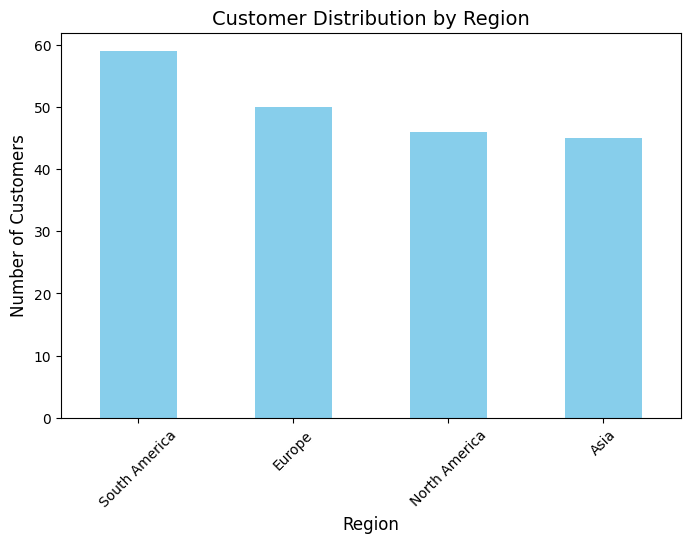

In [6]:
import matplotlib.pyplot as plt

customers['Region'].value_counts().plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Customer Distribution by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45)
plt.show()


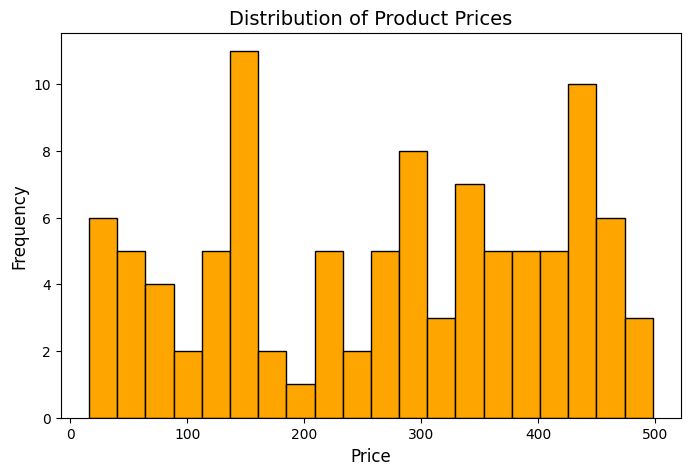

In [7]:
products['Price'].plot(kind='hist', bins=20, color='orange', edgecolor='black', figsize=(8, 5))
plt.title("Distribution of Product Prices", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


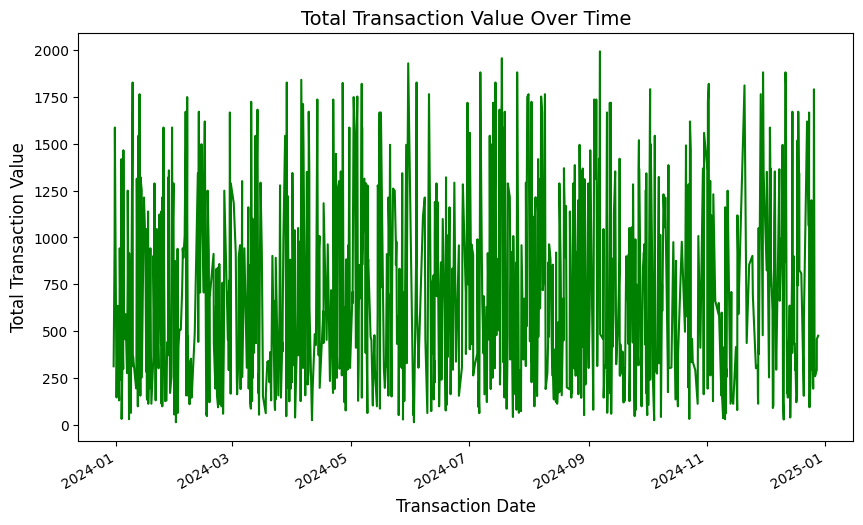

In [8]:
transactions.groupby('TransactionDate')['TotalValue'].sum().plot(figsize=(10, 6), color='green')
plt.title("Total Transaction Value Over Time", fontsize=14)
plt.xlabel("Transaction Date", fontsize=12)
plt.ylabel("Total Transaction Value", fontsize=12)
plt.show()


In [39]:
merged_df = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])


In [40]:
top_spenders = merged_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)


In [41]:
customers['SignupMonthYear'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers['SignupMonthYear'].value_counts().sort_index()


In [42]:
region_counts = customers['Region'].value_counts()


In [43]:
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)


In [44]:
category_revenue = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)


In [46]:
merged_df.drop(columns=['Price_y'], inplace=True)
merged_df.rename(columns={'Price_x': 'Price'}, inplace=True)

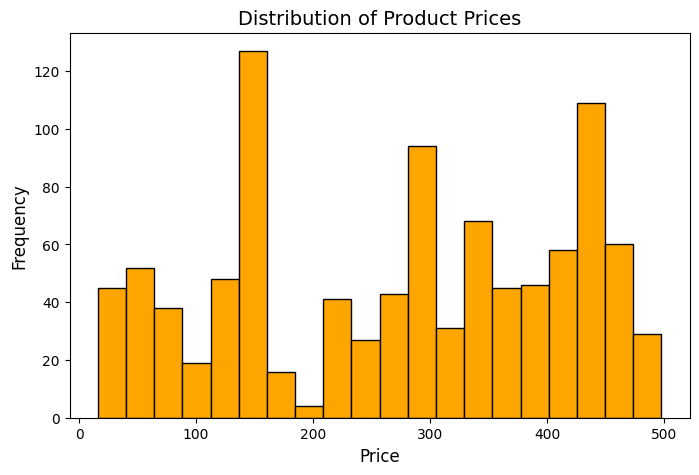

In [47]:
merged_df['Price'].plot(kind='hist', bins=20, color='orange', edgecolor='black', figsize=(8, 5))
plt.title("Distribution of Product Prices", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


In [48]:
revenue_trend = merged_df.groupby('TransactionDate')['TotalValue'].sum()
repeat_customers = merged_df.groupby('CustomerID')['TransactionID'].nunique().value_counts()
merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.month
merged_df['TransactionWeekday'] = merged_df['TransactionDate'].dt.day_name()


In [49]:
rfm = merged_df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (merged_df['TransactionDate'].max() - x.max()).days,
    'TransactionID': 'count',
    'TotalValue': 'sum'
}).rename(columns={'TransactionDate': 'Recency', 'TransactionID': 'Frequency', 'TotalValue': 'Monetary'})

high_value_customers = rfm[rfm['Monetary'] > rfm['Monetary'].quantile(0.75)]


<Axes: xlabel='Region'>

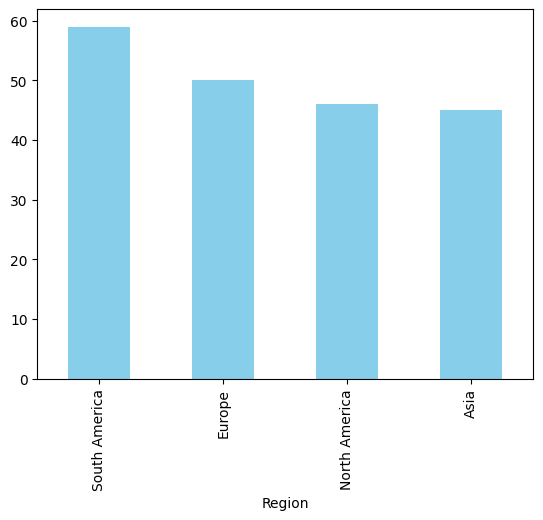

In [50]:
customers['Region'].value_counts().plot(kind='bar', color='skyblue')



<Axes: xlabel='Category'>

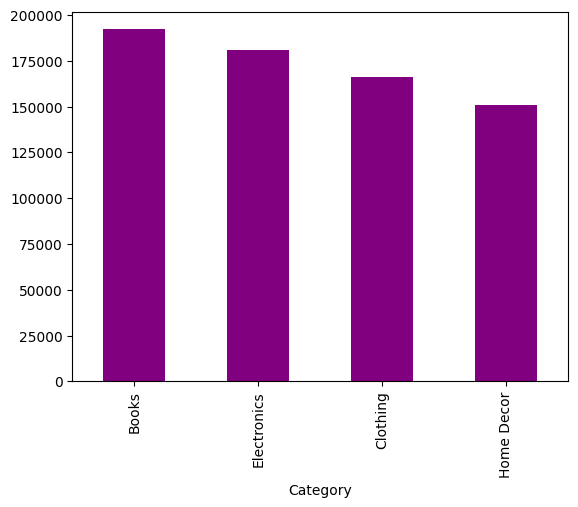

In [51]:
category_revenue.plot(kind='bar', color='purple')


<Axes: xlabel='TransactionDate'>

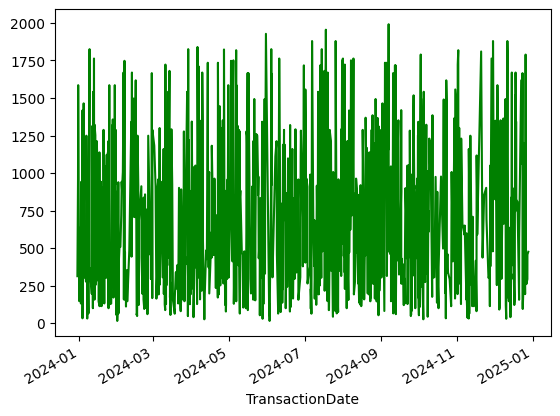

In [52]:
revenue_trend.plot(kind='line', color='green')


<Axes: ylabel='ProductName'>

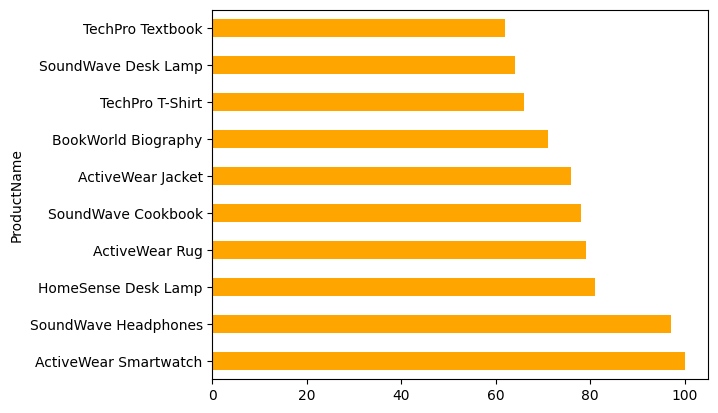

In [53]:
top_products.plot(kind='barh', color='orange')